# Classification algorithm
* The classification algorithm is used to identify the category of new observations on the basis of training data.
* In classification, a program learns from the given dataset or observations and then classifies new observations into a number of classes or groups.
* Such as, Yes or No, 0 or 1, Spam or Not-spam, Cat or Dog etc. Classes can be called as targets/labels or categories.
* there are two types of classifications:- 
    * Binary Classifier:- If the classification problem has only two possible outcomes, then it is called as Binary Classifier.
    ex- Spam or Not Spam, Cat or Dog etc.
    * Multi-class Classifier:- If a classification problem has more than two outcomes, then it is called as Multi-class Classifier.
    ex- Classifications of types of crops, Classificaitons of types of music

#### Types of classification algorithms
1. Non-linear models
    * K-Nearest Neighbours
    * SVM
    * Naive Bayes
    * Decision Tree Classification
    * Random Forest Classification
2. Linear Models
    * Logistic Regression
    * Support Vector Machines

#### Evaluating A Classification Model
* Log Loss or Cross-Entropy Loss
* Confusion Matrix
* AUC-ROC curve

## Logistic Regression
* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.
* It is used for predicting the categorical dependent variable using a given set of independent variables.
* Therefore, the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1. it gives the probabilistic values which lie between 0 and 1.
* Types of Logistic regression(on the basis of the categories, logistic regression can be classified into three types)
    * Binomial: In binomial logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, pass or fail etc.
    * Multinomial: In multinomial logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as 'cat', 'dog' or 'sheep'.
    * ordinal: In ordinal logistic regression, there can be 3 or more possible ordered types of dependent variables, such as 'low', 'medium' or 'hight'.
* Logistic regression equation :-
    * The logistic regression equation can be obtained from the linear regression equation. The mathematical steps to get logistic regression equations are given below.
    * y = 1/1+e^-x
        * y = dependent variable(Bought Product)
        * x = independent variable(salary)
        * e = Euler's constant - 2.71828


## Confusion Matrix
* A confusion matrix is a sinple and useful tool for understanding the performance of a classification model, like one used in machine learning or statistics.
* It helps you evaluate how well your model is doing in categorizing things correctly.
* It is also known as the error matrix.
* The matrix consists of predictions result in a summarized form, which has a number of correct predictions and correct predictions and incorrect predictions.

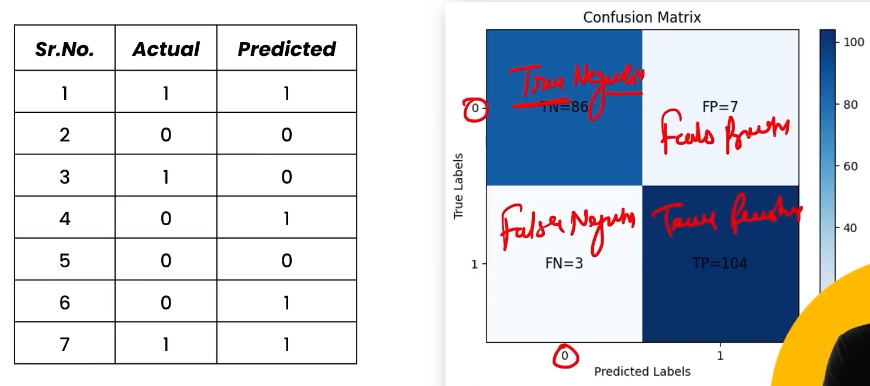

* Accuracy = TP + TM / N
* Error = FN + FP / N
* False Negative = The model has predicted no, but the actual value was yes, it is called as Type-Ⅱ error.
* False Positive = The model has predicted yes, but the actual value was no, it is called as Type-Ⅰ error.

* If the value of following parameters is defining the accuracy or the performance of the model, if the value is high then the model is performing very well, if the value is low then the model is not performing very well
* Precision: TP/TP+FP
    * It helps us to measure the ability to classify positive samples in the model.
* Recall: TP/TP+FN
    * It helps us to measure how many positive samples were correctly classified by the ML model.
* F1-score: 
    * It is the harmonic mean of precision and recall. It takes both false positive and false negative into account. Therefore, it performs well on an imbalanced dataset.
    * F1-score = 2 * (Precision * Recall) / (Precision + Recall)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [23]:
df = pd.read_csv('../../dataset/college_student_placement_dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [24]:
df.drop(columns=['College_ID','IQ','Academic_Performance','Internship_Experience','Extra_Curricular_Score','Communication_Skills','Projects_Completed'],inplace=True)
df.head()

,Prev_Sem_Result,CGPA,Placement
0,6.61,6.28,No
1,5.52,5.37,No
2,5.36,5.83,No
3,5.47,5.75,No
4,7.91,7.69,No


In [25]:
df.rename(columns={'Prev_Sem_Result':'score','Placement':'placed','CGPA':'cgpa'},inplace=True)
df.head()

,score,cgpa,placed
0,6.61,6.28,No
1,5.52,5.37,No
2,5.36,5.83,No
3,5.47,5.75,No
4,7.91,7.69,No


In [26]:
# traditional method of encoding
df['placed']=df['placed'].map({'No':0,'Yes':1})
df.head()

,score,cgpa,placed
0,6.61,6.28,0
1,5.52,5.37,0
2,5.36,5.83,0
3,5.47,5.75,0
4,7.91,7.69,0


In [27]:
# OneHot Encoding method
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
print(pd.DataFrame(ohe.fit_transform(df[['placed']]).toarray(),columns=['placed_no','placed']).drop(columns='placed_no').convert_dtypes('int64').head())

# LabelEncoding method
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(pd.DataFrame(le.fit_transform(df[['placed']]),columns=['placed']).head())

   placed
0       0
1       0
2       0
3       0
4       0
   placed
0       0
1       0
2       0
3       0
4       0


e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
x = df.drop(columns=['placed'])
y = df['placed']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
lr.score(x_test,y_test)

0.8388

## Creating Confusion matrix using sklearn 

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [34]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[2096,    0],
       [ 403,    1]])

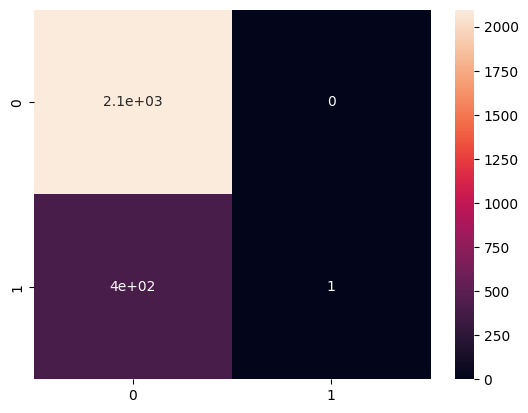

In [35]:
sns.heatmap(cf,annot=True)
plt.show()

In [36]:
precision_score(y_test,lr.predict(x_test))*100

100.0

In [37]:
recall_score(y_test,lr.predict(x_test))*100

0.24752475247524752